In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

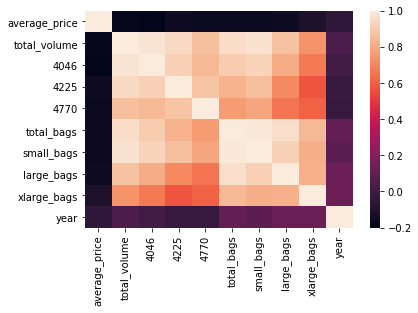

In [14]:
df = pd.read_csv('Tableau/avocado-updated-2020.csv')
corr = df.corr()


# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns)

In [15]:
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,conventional,2015,Albany
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,organic,2015,Albany
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,conventional,2015,Atlanta
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,organic,2015,Atlanta
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,conventional,2015,Baltimore/Washington
...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,organic,2020,Total U.S.
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,conventional,2020,West
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,organic,2020,West
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,conventional,2020,West Tex/New Mexico


In [4]:
df = df[df['geography'] == 'Total U.S.']
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
grouped = df.groupby(['year', 'month']).mean()
grouped.head()

<ipython-input-4-614015c4e56c>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = df['date'].apply(lambda x: x.split('-')[1])
<ipython-input-4-614015c4e56c>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = df['date'].apply(lambda x: x.split('-')[0])


average_price  total_volume          4046          4225  \
year month                                                            
2015 01            1.2325  1.505669e+07  6.111703e+06  6.149645e+06   
     02            1.2275  1.718793e+07  7.311859e+06  6.808472e+06   
     03            1.2560  1.587573e+07  6.694906e+06  6.104917e+06   
     04            1.2975  1.631906e+07  7.219332e+06  5.908519e+06   
     05            1.2570  1.827522e+07  8.138431e+06  6.689806e+06   

                    4770    total_bags    small_bags    large_bags  \
year month                                                           
2015 01     415870.75750  2.379471e+06  1.954999e+06  418093.47250   
     02     490406.29000  2.577192e+06  2.156895e+06  409537.64625   
     03     468142.75500  2.607765e+06  2.238782e+06  354610.27900   
     04     451439.66625  2.739770e+06  2.329308e+06  399510.53375   
     05     479464.84300  2.967514e+06  2.504960e+06  451378.08400   

            xlarge_bags  
year month               
2015 01      6378.57750  
     02     10759.73875  
     03     14372.52300  
     04     10951.84625  
     05     11175.70600

In [5]:
data = pd.DataFrame({'average_price': grouped['average_price'],
                     'total_volume': grouped['total_volume']})

x, y = data['average_price'], data['total_volume']



In [6]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y)
xTrain, yTrain = np.array(xTrain).reshape(-1,1), np.array(yTrain).reshape(-1,1)
xTest, yTest = np.array(xTest).reshape(-1,1), np.array(yTest).reshape(-1,1)

In [7]:
res = LinearRegression().fit(xTrain, yTrain)

In [8]:
score = res.score(np.array(xTrain).reshape(-1,1), np.array(yTrain).reshape(-1,1))
print(f'RSQ = {score}')

RSQ = 0.07570228477889795


In [9]:
predictions = res.predict(xTest)
actual = []
predictionCol = []
for a in yTest:
    actual.append(a[0])
for p in predictions:
    predictionCol.append(p[0])
predictionDF = pd.DataFrame({'Predicted': predictionCol,
                              'Actual': actual})
predictionDF.head()

,Predicted,Actual
0,2.091623e+07,1.791182e+07
1,2.001267e+07,2.627333e+07
2,2.198281e+07,1.688611e+07
3,1.836860e+07,1.223828e+07
4,2.036231e+07,1.937318e+07


In [10]:
# Result analysis
predictionDF['Error'] = predictionDF['Actual'] - predictionDF['Predicted']
predictionDF['Error'] = predictionDF['Error'].apply(abs)
predictionDF['pctError'] = (predictionDF['Error'] / predictionDF['Actual']) * 100
predictionDF.head()

,Predicted,Actual,Error,pctError
0,2.091623e+07,1.791182e+07,3.004402e+06,16.773288
1,2.001267e+07,2.627333e+07,6.260655e+06,23.828936
2,2.198281e+07,1.688611e+07,5.096705e+06,30.182830
3,1.836860e+07,1.223828e+07,6.130326e+06,50.091421
4,2.036231e+07,1.937318e+07,9.891252e+05,5.105641


In [11]:
meanAbsErr = predictionDF['pctError'].mean()
print(f'Mean absolute Error = {round(meanAbsErr, 2)}%')

Mean absolute Error = 17.09%


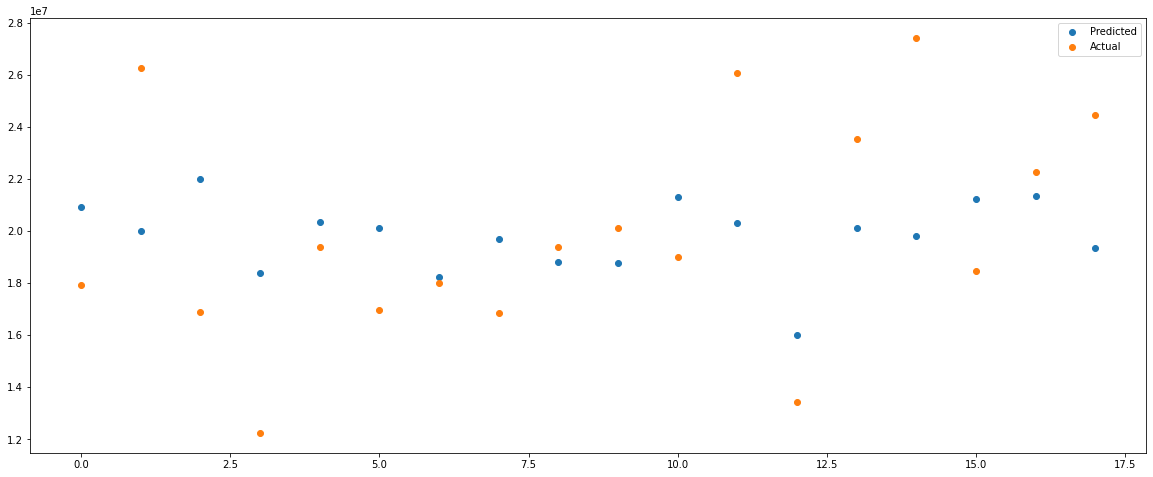

In [12]:
plt.figure(figsize=(20,8))
plt.scatter(predictionDF.index, predictionDF['Predicted'])
plt.scatter(predictionDF.index, predictionDF['Actual'])
plt.legend(['Predicted', 'Actual'])
plt.show()

Mostly overly-fitted linear measurements, However this model somewhat accurately follows dips in the avocado market (presumably droughts or other big market events)

In [31]:
df = pd.read_csv('Tableau/avocado-updated-2020.csv')
df['month'] = df['date'].apply(lambda x: x.split('-')[1])
df['year'] = df['date'].apply(lambda x: x.split('-')[0])
df['type'] = df['type'].apply(lambda x: 1 if x == 'organic' else 0)
df

,date,average_price,total_volume,4046,4225,4770,total_bags,small_bags,large_bags,xlarge_bags,type,year,geography,month
0,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.00,0,2015,Albany,01
1,2015-01-04,1.79,1373.95,57.42,153.88,0.00,1162.65,1162.65,0.00,0.00,1,2015,Albany,01
2,2015-01-04,1.00,435021.49,364302.39,23821.16,82.15,46815.79,16707.15,30108.64,0.00,0,2015,Atlanta,01
3,2015-01-04,1.76,3846.69,1500.15,938.35,0.00,1408.19,1071.35,336.84,0.00,1,2015,Atlanta,01
4,2015-01-04,1.08,788025.06,53987.31,552906.04,39995.03,141136.68,137146.07,3990.61,0.00,0,2015,Baltimore/Washington,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,67544.48,97996.46,2617.17,1414878.10,906711.52,480191.83,27974.75,1,2020,Total U.S.,11
33041,2020-11-29,0.91,5811114.22,1352877.53,589061.83,19741.90,3790665.29,2197611.02,1531530.14,61524.13,0,2020,West,11
33042,2020-11-29,1.48,289961.27,13273.75,19341.09,636.51,256709.92,122606.21,134103.71,0.00,1,2020,West,11
33043,2020-11-29,0.67,822818.75,234688.01,80205.15,10543.63,497381.96,285764.11,210808.02,809.83,0,2020,West Tex/New Mexico,11


In [32]:
df = pd.merge(df, pd.get_dummies(df['year']), left_index=True, right_index=True)
df = pd.merge(df, pd.get_dummies(df['geography']), left_index=True, right_index=True)
df = pd.merge(df, pd.get_dummies(df['month']), left_index=True, right_index=True)
for col in ['4046', '4225', '4770', 'small_bags', 'large_bags']:
    del df[col]
df.columns

Index(['date', 'average_price', 'total_volume', 'total_bags', 'xlarge_bags',
       'type', 'year', 'geography', 'month', '2015', '2016', '2017', '2018',
       '2019', '2020', 'Albany', 'Atlanta', 'Baltimore/Washington', 'Boise',
       'Boston', 'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York', 'Northeast',
       'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson',
       'Pittsburgh', 'Plains', 'Portland', 'Raleigh/Greensboro',
       'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
       'San Francisco', 'Seattle', 'South Carolina', 'South Central',
       'Southeast', 'Spokane', 'St. Louis', 'Syra

In [43]:
y = df['average_price']
x = df[['total_volume', '2015', '2016', '2017', '2018',
       '2019', '2020', 'Albany', 'Atlanta', 'Baltimore/Washington', 'Boise',
       'Boston', 'Buffalo/Rochester', 'California', 'Charlotte', 'Chicago',
       'Cincinnati/Dayton', 'Columbus', 'Dallas/Ft. Worth', 'Denver',
       'Detroit', 'Grand Rapids', 'Great Lakes', 'Harrisburg/Scranton',
       'Hartford/Springfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'Las Vegas', 'Los Angeles', 'Louisville', 'Miami/Ft. Lauderdale',
       'Midsouth', 'Nashville', 'New Orleans/Mobile', 'New York', 'Northeast',
       'Northern New England', 'Orlando', 'Philadelphia', 'Phoenix/Tucson',
       'Pittsburgh', 'Plains', 'Portland', 'Raleigh/Greensboro',
       'Richmond/Norfolk', 'Roanoke', 'Sacramento', 'San Diego',
       'San Francisco', 'Seattle', 'South Carolina', 'South Central',
       'Southeast', 'Spokane', 'St. Louis', 'Syracuse', 'Tampa', 'Total U.S.',
       'West', 'West Tex/New Mexico', '01', '02', '03', '04', '05', '06', '07',
       '08', '09', '10', '11', '12' ]]
x

,total_volume,2015,2016,2017,2018,2019,2020,Albany,Atlanta,Baltimore/Washington,...,03,04,05,06,07,08,09,10,11,12
0,40873.28,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1373.95,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,435021.49,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,3846.69,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,788025.06,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,1583056.27,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33041,5811114.22,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33042,289961.27,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
33043,822818.75,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [44]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y)


In [45]:
xTrain

,total_volume,2015,2016,2017,2018,2019,2020,Albany,Atlanta,Baltimore/Washington,...,03,04,05,06,07,08,09,10,11,12
23862,495732.31,0,0,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
30758,32232.21,0,0,0,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2031,37079.86,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
9298,2908.99,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9326,6033.01,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14350,7773.43,0,0,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
30076,4605.00,0,0,0,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2687,4436.79,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
31991,497311.47,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [49]:
res = LinearRegression().fit(xTrain, yTrain)
score = res.score(xTrain, yTrain)
print(f'RSQ = {score}')

RSQ = 0.27509561360508916


In [52]:
df['prediction'] = res.predict(x)
df

,date,average_price,total_volume,total_bags,xlarge_bags,type,year,geography,month,2015,...,04,05,06,07,08,09,10,11,12,prediction
0,2015-01-04,1.22,40873.28,9716.46,0.00,0,2015,Albany,01,1,...,0,0,0,0,0,0,0,0,0,1.386286
1,2015-01-04,1.79,1373.95,1162.65,0.00,1,2015,Albany,01,1,...,0,0,0,0,0,0,0,0,0,1.387426
2,2015-01-04,1.00,435021.49,46815.79,0.00,0,2015,Atlanta,01,1,...,0,0,0,0,0,0,0,0,0,1.199755
3,2015-01-04,1.76,3846.69,1408.19,0.00,1,2015,Atlanta,01,1,...,0,0,0,0,0,0,0,0,0,1.212204
4,2015-01-04,1.08,788025.06,141136.68,0.00,0,2015,Baltimore/Washington,01,1,...,0,0,0,0,0,0,0,0,0,1.361464
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33040,2020-11-29,1.47,1583056.27,1414878.10,27974.75,1,2020,Total U.S.,11,0,...,0,0,0,0,0,0,0,1,0,1.713779
33041,2020-11-29,0.91,5811114.22,3790665.29,61524.13,0,2020,West,11,0,...,0,0,0,0,0,0,0,1,0,1.150922
33042,2020-11-29,1.48,289961.27,256709.92,0.00,1,2020,West,11,0,...,0,0,0,0,0,0,0,1,0,1.310325
33043,2020-11-29,0.67,822818.75,497381.96,809.83,0,2020,West Tex/New Mexico,11,0,...,0,0,0,0,0,0,0,1,0,1.127380


In [58]:
df['pctAbsDiff'] = (df['prediction'] - df['average_price']) / df['average_price']
df['pctAbsDiff'] = df['pctAbsDiff'].apply(lambda x: x * 100)


ValueError: plot kind scatter can only be used for data frames

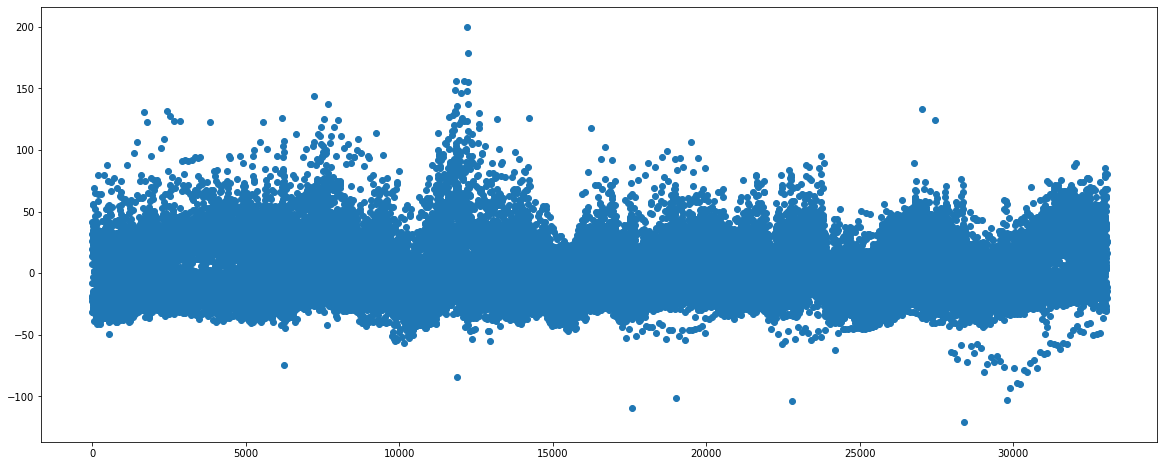

In [60]:
plt.figure(figsize=(20,8))
plt.scatter(df.index, df['pctAbsDiff'])

<AxesSubplot:>

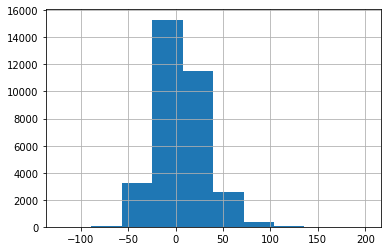

In [61]:
df['pctAbsDiff'].hist()